### Import the basic packages

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the dataset

In [55]:
df = pd.read_csv("Zomato_Kolkata_Restaurants.csv")
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Jyoti Vihar,https://www.zomato.com/kolkata/jyoti-vihar-cam...,South Indian,"Camac Street Area, Kolkata",Opens tomorrow at 10am,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",9.19748E+11,1,1,1,1,4.4,930,4.1,5498,South Indian Delicacies,"Milk Upma, Jyoti Vihar, Vada Sambar, Filtered ...","South Indian Food, Good Crowd, Excellent Place...",300
1,WOW! Momo,https://www.zomato.com/kolkata/wow-momo-park-s...,"Momos, Fast Food, Tibetan","Park Street Area, Kolkata",9am – 3am (Today),"57, Park Street, Beside Vodafone Store, Park S...",9.17604E+11,1,1,1,0,4,469,4.1,11100,NaN,"Tandoori Paneer Momos, Momo Platter, Chocolate...","Comfortable Seating Area, Staff Service, Famil...",350
2,Zam Zam,https://www.zomato.com/kolkata/zam-zam-park-ci...,"Biryani, Rolls","Park Circus Area, Kolkata",Opens at 12noon,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",9.19749E+11,1,1,1,0,4.4,1901,4.3,83100,NaN,"Beef Malai, Beef Bhuna, Hariyali Chicken, Sahi...","Ordering Process, Gastronomical Experience, Co...",500
3,Daily Bhoj,https://www.zomato.com/kolkata/daily-bhoj-topsia,Bengali,"Topsia, Kolkata",NaN,"139/1G, Tljala Road, Topsia, Kolkata",9.19331E+11,1,0,0,0,-,0,3.9,2260,NaN,NaN,"Great Portions, Worth the Money, Timely Servic...",150
4,Behnam,https://www.zomato.com/kolkata/behnam-topsia,"Biryani, North Indian, Mughlai, Rolls, Kebab, ...","Topsia, Kolkata",Opens at 11am,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",9.19331E+11,1,1,0,0,-,0,2.9,151,NaN,NaN,"Worth the Money, Timely Service, Great Portion...",200


### EDA

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              4923 non-null   object
 1   URL               4923 non-null   object
 2   Cuisines          4923 non-null   object
 3   Area              4923 non-null   object
 4   Timing            3281 non-null   object
 5   Full_Address      4923 non-null   object
 6   PhoneNumber       4923 non-null   object
 7   IsHomeDelivery    4923 non-null   int64 
 8   isTakeaway        4923 non-null   int64 
 9   isIndoorSeating   4923 non-null   int64 
 10  isVegOnly         4923 non-null   int64 
 11  Dinner Ratings    4923 non-null   object
 12  Dinner Reviews    4923 non-null   int64 
 13  Delivery Ratings  4923 non-null   object
 14  Delivery Reviews  4923 non-null   int64 
 15  KnownFor          199 non-null    object
 16  PopularDishes     1004 non-null   object
 17  PeopleKnownFor

### Drop the unnecessary columns

In [57]:
# drop the unnecessary column
df.drop(columns=['KnownFor','PopularDishes','PeopleKnownFor','Timing','URL','PhoneNumber'],inplace=True)


In [58]:
# Rechecking the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              4923 non-null   object
 1   Cuisines          4923 non-null   object
 2   Area              4923 non-null   object
 3   Full_Address      4923 non-null   object
 4   IsHomeDelivery    4923 non-null   int64 
 5   isTakeaway        4923 non-null   int64 
 6   isIndoorSeating   4923 non-null   int64 
 7   isVegOnly         4923 non-null   int64 
 8   Dinner Ratings    4923 non-null   object
 9   Dinner Reviews    4923 non-null   int64 
 10  Delivery Ratings  4923 non-null   object
 11  Delivery Reviews  4923 non-null   int64 
 12  AverageCost       4923 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 500.1+ KB


### Drop the duplicate retaurant if any

In [59]:
# Drop the duplicates in case of same restaurent name
print("Records before duplicates removal :",len(df))
df.drop_duplicates(subset=['Name','Full_Address'],inplace=True ,keep=False)
print("Records after duplicates removal :",len(df))

Records before duplicates removal : 4923
Records after duplicates removal : 4919


### Checking for null values

In [60]:
df.isna().sum().sum()

0

### Handling Cuisine for the restaurents

In [61]:
df['Cuisines'] = df['Cuisines'].str.lower()
df['Cuisines']

0                                            south indian
1                               momos, fast food, tibetan
2                                          biryani, rolls
3                                                 bengali
4       biryani, north indian, mughlai, rolls, kebab, ...
                              ...                        
4918                                     coffee, sandwich
4919    north indian, fast food, street food, beverage...
4920                                chinese, north indian
4921                       chinese, bengali, south indian
4922                                  mishti, street food
Name: Cuisines, Length: 4919, dtype: object

#### Creating a list of all the available cuisines

In [62]:

listi=[]
all_cuisines=[]
bag_of_cuisines = df['Cuisines'].tolist()
for cuisine in bag_of_cuisines:
    listi = cuisine.split(", ")
    for food in listi:
        all_cuisines.append(food)
 
all_cuisines

['south indian',
 'momos',
 'fast food',
 'tibetan',
 'biryani',
 'rolls',
 'bengali',
 'biryani',
 'north indian',
 'mughlai',
 'rolls',
 'kebab',
 'awadhi',
 'lucknowi',
 'biryani',
 'mughlai',
 'biryani',
 'mughlai',
 'north indian',
 'rolls',
 'kebab',
 'chinese',
 'momos',
 'desserts',
 'beverages',
 'biryani',
 'north indian',
 'kebab',
 'bengali',
 'pizza',
 'fast food',
 'beverages',
 'desserts',
 'burger',
 'fast food',
 'biryani',
 'desserts',
 'beverages',
 'pizza',
 'fast food',
 'desserts',
 'beverages',
 'ice cream',
 'desserts',
 'bakery',
 'desserts',
 'fast food',
 'mishti',
 'south indian',
 'street food',
 'chinese',
 'fast food',
 'north indian',
 'beverages',
 'bengali',
 'biryani',
 'north indian',
 'chinese',
 'fast food',
 'burger',
 'fast food',
 'beverages',
 'biryani',
 'kebab',
 'awadhi',
 'mughlai',
 'mishti',
 'desserts',
 'fast food',
 'street food',
 'biryani',
 'north indian',
 'rolls',
 'north indian',
 'fast food',
 'south indian',
 'street food',
 'c

In [63]:
def count_items(completeList):
    keys, counts = np.unique(completeList, return_counts=True)
    n= len(completeList)
    #create dictionary
    res = {keys[i]: counts[i] for i in range(len(keys))}
    res =dict(sorted(res.items(), key=lambda item: item[1] , reverse=True))
    return res
 
    


Checking for the most common cuisnes

In [113]:
res_list = count_items(all_cuisines)
print("No. of unique items :",len(res_list))

# Using top 30 items as recommended items
popular_cuisines =[]
count = 0
for keys,values in res_list.items():
    if count == 25:
        break
    
    print(keys,"   ",values)
    popular_cuisines.append(keys);
    count += 1
    

No. of unique items : 90
chinese     1888
north indian     1682
fast food     1655
beverages     1166
desserts     939
biryani     861
bengali     675
rolls     487
mughlai     449
sandwich     362
street food     342
shake     336
pizza     325
momos     304
kebab     303
continental     291
burger     287
bakery     275
south indian     274
italian     244
seafood     232
ice cream     223
mishti     141
asian     137
cafe     115


In [65]:
# Takign the first 40 items in this dictionary as the most prominent cuisines
count = 0
List_of_cuisine=[]
for keys,values in res_list.items():
    List_of_cuisine.append(keys)
    
List_of_cuisine.sort()

len(List_of_cuisine)
List_of_cuisine.remove('')
List_of_cuisine


['afghan',
 'american',
 'andhra',
 'arabian',
 'asian',
 'assamese',
 'awadhi',
 'bakery',
 'bangladeshi',
 'bar food',
 'bbq',
 'bengali',
 'beverages',
 'bihari',
 'biryani',
 'bubble tea',
 'burger',
 'burmese',
 'cafe',
 'cantonese',
 'chettinad',
 'chinese',
 'coffee',
 'continental',
 'desserts',
 'drinks only',
 'european',
 'fast food',
 'filipino',
 'finger food',
 'frozen yogurt',
 'goan',
 'greek',
 'gujarati',
 'healthy food',
 'hot dogs',
 'hyderabadi',
 'ice cream',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'kerala',
 'korean',
 'lebanese',
 'lucknowi',
 'maharashtrian',
 'malaysian',
 'malwani',
 'mangalorean',
 'mediterranean',
 'mexican',
 'middle eastern',
 'mishti',
 'mithai',
 'modern indian',
 'momos',
 'mongolian',
 'mughlai',
 'naga',
 'nepalese',
 'north eastern',
 'north indian',
 'odia',
 'oriental',
 'paan',
 'parsi',
 'pasta',
 'pizza',
 'rajasthani',
 'roast chicken',
 'rolls',
 'russian',
 'salad',
 'sandwich',
 'seafood',
 'shake',
 'south indian',


### Modifying the Area 

In [66]:
# Now the Area
def modify_Area(txt):
    end_index = txt.index(", ")
    return txt[0:end_index]

#only once
df['Area'] = df['Area'].apply(modify_Area)


In [110]:
list_of_Area = df['Area']
list_of_Area 

# Calculating what places occurs how many times

dict_Important_Area = count_items(list_of_Area)
print("No of unique Area :",len(dict_Important_Area))
#get popular area

popular_areas =[]
count = 0
for keys,values in dict_Important_Area.items():
    if count ==25:
        break
    
    print(keys,"   ",values)
    popular_areas.append(keys);
    count += 1
    
popular_areas

No of unique Area : 143
New Town     347
Chinar Park     226
Baguihati     203
Behala     194
Sector 5     177
Tollygunge     177
Dum Dum     132
Kestopur     123
Jadavpur     122
Sector 1     114
Kasba     109
Park Circus Area     106
Ballygunge     103
Garia     92
Park Street Area     91
Bangur     80
Picnic Garden     78
New Alipore     76
Kaikhali     72
Kankurgachi     72
Naktala     71
Bhawanipur     64
Southern Avenue     64
Prince Anwar Shah Road     61
Topsia     61


['New Town',
 'Chinar Park',
 'Baguihati',
 'Behala',
 'Sector 5',
 'Tollygunge',
 'Dum Dum',
 'Kestopur',
 'Jadavpur',
 'Sector 1',
 'Kasba',
 'Park Circus Area',
 'Ballygunge',
 'Garia',
 'Park Street Area',
 'Bangur',
 'Picnic Garden',
 'New Alipore',
 'Kaikhali',
 'Kankurgachi',
 'Naktala',
 'Bhawanipur',
 'Southern Avenue',
 'Prince Anwar Shah Road',
 'Topsia']

### Modifying the other features

In [68]:
# Modifying the home delivery , Takeaway, indoor seating and veg only features

# Example 1: Replace values of columns by using dfFrame.loc[] property.
df.loc[df['IsHomeDelivery'] == 1, 'IsHomeDelivery'] = "homedelivery"
df.loc[df['IsHomeDelivery'] == 0, 'IsHomeDelivery'] = ""

df.loc[df['isIndoorSeating'] == 1, 'isIndoorSeating'] = 'indoorseating'
df.loc[df['isIndoorSeating'] == 0, 'isIndoorSeating'] = ""

df.loc[df['isTakeaway'] == 1, 'isTakeaway'] = 'takeaway'
df.loc[df['isTakeaway'] == 0, 'isTakeaway'] = ""

df.loc[df['isVegOnly'] == 1, 'isVegOnly'] = 'vegonly'
df.loc[df['isVegOnly'] == 0, 'isVegOnly'] = ""



In [69]:
df.head()

,Name,Cuisines,Area,Full_Address,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
0,Jyoti Vihar,south indian,Camac Street Area,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",homedelivery,takeaway,indoorseating,vegonly,4.4,930,4.1,5498,300
1,WOW! Momo,"momos, fast food, tibetan",Park Street Area,"57, Park Street, Beside Vodafone Store, Park S...",homedelivery,takeaway,indoorseating,,4,469,4.1,11100,350
2,Zam Zam,"biryani, rolls",Park Circus Area,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",homedelivery,takeaway,indoorseating,,4.4,1901,4.3,83100,500
3,Daily Bhoj,bengali,Topsia,"139/1G, Tljala Road, Topsia, Kolkata",homedelivery,,,,-,0,3.9,2260,150
4,Behnam,"biryani, north indian, mughlai, rolls, kebab, ...",Topsia,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",homedelivery,takeaway,,,-,0,2.9,151,200


### Evaluating the reviews

In [70]:
# Changing the -  to 0
df.loc[df['Dinner Ratings'] == '-', 'Dinner Ratings'] = '0'
df.loc[df['Delivery Ratings'] == '-', 'Delivery Ratings'] = '0'
df['Delivery Ratings'] = df['Delivery Ratings'].astype(float)
df['Dinner Ratings'] = df['Dinner Ratings'].astype(float)

In [71]:
#  Calculating the weighted total rating
#  Total number of reviews
df['Total Reviews'] = df['Dinner Reviews'] + df['Delivery Reviews']
df['Total Reviews']


0        6428
1       11569
2       85001
3        2260
4         151
        ...  
4918        8
4919        0
4920        0
4921        0
4922      618
Name: Total Reviews, Length: 4919, dtype: int64

In [72]:
# For the weighted reviews
def Calculate_Rating(DinnerRating,DinnerReview,DeliveryRating,DeliveryReview):
    res = (DinnerRating * DinnerReview + DeliveryRating * DeliveryReview)/(DinnerReview + DeliveryReview)
    return res


df['Total Ratings'] = Calculate_Rating(DinnerRating=df['Delivery Ratings'],DinnerReview=df['Dinner Reviews'],DeliveryRating=df['Delivery Ratings'],DeliveryReview=df['Delivery Reviews'])
df['Total Ratings'] = df['Total Ratings'].replace(np.nan, 0)
df['Total Ratings']

0       4.1
1       4.1
2       4.3
3       3.9
4       2.9
       ... 
4918    0.0
4919    0.0
4920    0.0
4921    0.0
4922    4.4
Name: Total Ratings, Length: 4919, dtype: float64

#### Cost For One


In [73]:
df['AverageCost'].describe()

count    4919.000000
mean      340.872128
std       332.614496
min        50.000000
25%       150.000000
50%       250.000000
75%       400.000000
max      4000.000000
Name: AverageCost, dtype: float64

Cost ranges from 50 to 4000 with the mean value of 341
* Upper quartile : 400
* Lower Quartile : 150

In [74]:

# Change to cost category
# trying a range to get a good cost distribuition
def Give_Cost_Category(x):
    if(x > 0 and x < 180):
        return 'cheapeats'
    elif (x > 180 and x < 420):
        return 'midrange'
    else:
        return 'expensive'
    
df['Cost Category'] = df['AverageCost'].apply(Give_Cost_Category)

df['Cost Category']

0        midrange
1        midrange
2       expensive
3       cheapeats
4        midrange
          ...    
4918     midrange
4919    cheapeats
4920    cheapeats
4921     midrange
4922    cheapeats
Name: Cost Category, Length: 4919, dtype: object

In [75]:
# Understanding the proportions of cost category

df.groupby('Cost Category')['Name'].count()

Cost Category
cheapeats    1821
expensive    1160
midrange     1938
Name: Name, dtype: int64

### Understanding the distribuition of Cost

<Axes: xlabel='Cost Category'>

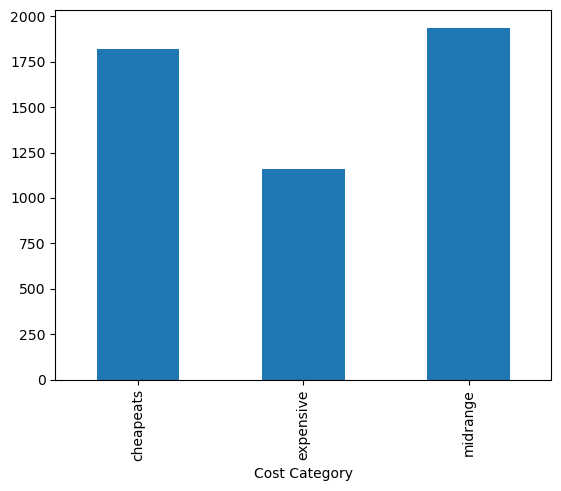

In [76]:
df.groupby('Cost Category')['Name'].count().plot.bar()

In [77]:
df.dropna()

,Name,Cuisines,Area,Full_Address,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost,Total Reviews,Total Ratings,Cost Category
0,Jyoti Vihar,south indian,Camac Street Area,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",homedelivery,takeaway,indoorseating,vegonly,4.4,930,4.1,5498,300,6428,4.1,midrange
1,WOW! Momo,"momos, fast food, tibetan",Park Street Area,"57, Park Street, Beside Vodafone Store, Park S...",homedelivery,takeaway,indoorseating,,4.0,469,4.1,11100,350,11569,4.1,midrange
2,Zam Zam,"biryani, rolls",Park Circus Area,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",homedelivery,takeaway,indoorseating,,4.4,1901,4.3,83100,500,85001,4.3,expensive
3,Daily Bhoj,bengali,Topsia,"139/1G, Tljala Road, Topsia, Kolkata",homedelivery,,,,0.0,0,3.9,2260,150,2260,3.9,cheapeats
4,Behnam,"biryani, north indian, mughlai, rolls, kebab, ...",Topsia,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",homedelivery,takeaway,,,0.0,0,2.9,151,200,151,2.9,midrange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,Nettare Cafe,"coffee, sandwich",Topsia,"86 B/1, Topsia Road, Topsia, Kolkata",homedelivery,,,,0.0,0,0.0,8,200,8,0.0,midrange
4919,Alphabite,"north indian, fast food, street food, beverage...",Entally,"20B, Flat A/3, 3rd Floor, Convent Road, Opposi...",homedelivery,,,,0.0,0,0.0,0,150,0,0.0,cheapeats
4920,Bidyut Jana Caterer,"chinese, north indian",Kankurgachi,"1, Greenchoo Building, Near Swasthya Bhawan, K...",homedelivery,takeaway,,,0.0,0,0.0,0,50,0,0.0,cheapeats
4921,Chowpatty,"chinese, bengali, south indian",Sealdah Area,"Complex 1, Beleghata Main Road, Sealdah Area, ...",homedelivery,takeaway,indoorseating,,0.0,0,0.0,0,300,0,0.0,midrange


In [78]:
# Adding the features
df['Features'] = df['IsHomeDelivery']+' '+df['isTakeaway']+' '+df['isVegOnly']+' '+df['isIndoorSeating']

In [79]:
# Drop some useless columns
df.drop(columns=['Dinner Ratings','Dinner Reviews','Delivery Reviews','Delivery Ratings'],inplace=True)


In [80]:
df.drop(columns=['IsHomeDelivery','isTakeaway','isIndoorSeating','isVegOnly'],inplace=True)


In [81]:
# After deleting the useless columns : the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4922
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4919 non-null   object 
 1   Cuisines       4919 non-null   object 
 2   Area           4919 non-null   object 
 3   Full_Address   4919 non-null   object 
 4   AverageCost    4919 non-null   int64  
 5   Total Reviews  4919 non-null   int64  
 6   Total Ratings  4919 non-null   float64
 7   Cost Category  4919 non-null   object 
 8   Features       4919 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 384.3+ KB


Completing the text processing for all the features and data

In [82]:
# import the required packages
from ast import literal_eval

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer



In [83]:
# download nltk packages
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hrishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
# Completing the text processing for all the features and data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = word_tokenize(text)
    
    for word in words: 
        # Remove stop words and non alphabet tokens
        if word not in stop_words and word.isalpha(): 
            temp_sent.append(word)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    
    return full_sentence

Creating a bag of words = processed cuisines + processed features + cost category

In [86]:
df['processed_cuisines']=df['Cuisines'].apply(process_sentences)
df['processed_features'] = df['Features'].apply(process_sentences)
df['Testing Features'] = df['processed_features'] + ' '+df['Cost Category']
df['bag_of_words'] = df['processed_cuisines'] + ' '+df['processed_features']+' '+df['Cost Category']
df['bag_of_words']

0       south indian homedelivery takeaway vegonly ind...
1       momos fast food tibetan homedelivery takeaway ...
2       biryani rolls homedelivery takeaway indoorseat...
3                          bengali homedelivery cheapeats
4       biryani north indian mughlai rolls kebab awadh...
                              ...                        
4918                coffee sandwich homedelivery midrange
4919    north indian fast food street food beverages m...
4920    chinese north indian homedelivery takeaway che...
4921    chinese bengali south indian homedelivery take...
4922    mishti street food homedelivery takeaway vegon...
Name: bag_of_words, Length: 4919, dtype: object

In [87]:
df.drop(columns=['processed_cuisines','processed_features'],inplace=True)


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4922
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              4919 non-null   object 
 1   Cuisines          4919 non-null   object 
 2   Area              4919 non-null   object 
 3   Full_Address      4919 non-null   object 
 4   AverageCost       4919 non-null   int64  
 5   Total Reviews     4919 non-null   int64  
 6   Total Ratings     4919 non-null   float64
 7   Cost Category     4919 non-null   object 
 8   Features          4919 non-null   object 
 9   Testing Features  4919 non-null   object 
 10  bag_of_words      4919 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 461.2+ KB


In [89]:
df.to_csv('ProcessedData.csv', header=True, index=False)

## Creating the Model for Recommendation system

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances



In [91]:
def Evaluate_Model(description,Area,thismodel):
    
    # Convert user input to lowercase
    description = description.lower()

    data = df.copy()
    
    data = data[data['Area'] == Area]
        
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bag_of_words"])
    features = vec.transform(data["bag_of_words"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate the similarity for the differnt models
    similarity = thismodel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = similarity[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)

    #return data[['Name', 'Area', 'Full_Address', 'AverageCost', 'Cuisines', 'Total Ratings', 'similarity']].head(5)
    return data['similarity'].head(10)

In [92]:
def Evaluate_Model_Euclidean(description,Area,thismodel):
    
    # Convert user input to lowercase
    description = description.lower()

    data = df.copy()
    
    data = data[data['Area'] == Area]
        
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bag_of_words"])
    features = vec.transform(data["bag_of_words"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate the similarity for the differnt models
    distance = thismodel(description_vector, features)
    
    similarity = 1/(1+distance)
    data['similarity'] = similarity[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)
    
    return data[['Name', 'Area', 'AverageCost', 'Cuisines','Testing Features', 'Total Ratings', 'similarity']].head(5)
    return data['similarity'].head(10)

In [93]:
# User input
user_choice_cuisine ='momos biryani'
user_choice_Features = 'indoorseating'
user_choice_CostCategory ='midrange'
user_choice_Area='Park Street Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory



Evaluate_Model_Euclidean(description=description,Area=user_choice_Area,thismodel=euclidean_distances)

,Name,Area,AverageCost,Cuisines,Testing Features,Total Ratings,similarity
151,New Noodle King,Park Street Area,400,"chinese, seafood, momos",homedelivery takeaway indoorseating midrange,3.9,0.535730
632,Noodle Time,Park Street Area,400,"chinese, momos, seafood",homedelivery takeaway indoorseating midrange,4.0,0.535730
1,WOW! Momo,Park Street Area,350,"momos, fast food, tibetan",homedelivery takeaway indoorseating midrange,4.1,0.509509
262,The Biryani Mahal,Park Street Area,400,"biryani, north indian",homedelivery takeaway indoorseating midrange,3.5,0.507606
10,KFC,Park Street Area,400,"burger, fast food, biryani, desserts, beverages",homedelivery takeaway indoorseating midrange,4.2,0.473708


## Testing for various user input

In [94]:
# User input
user_choice_cuisine ='momos biryani'
user_choice_Features = 'indoorseating'
user_choice_CostCategory ='midrange'
user_choice_Area='Park Street Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory

Evaluate_Model(description=description,Area=user_choice_Area,thismodel=linear_kernel)
                 



151     0.624491
632     0.624491
1       0.536630
262     0.529519
10      0.382833
433     0.372195
867     0.346875
4120    0.334025
4674    0.321914
921     0.320134
Name: similarity, dtype: float64

In [95]:
# User input
user_choice_cuisine ='momos biryani'
user_choice_Features = 'indoorseating'
user_choice_CostCategory ='midrange'
user_choice_Area='Park Street Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory



Evaluate_Model(description=description,Area=user_choice_Area,thismodel=cosine_similarity)
                 

151     0.624491
632     0.624491
1       0.536630
262     0.529519
10      0.382833
433     0.372195
867     0.346875
4120    0.334025
4674    0.321914
921     0.320134
Name: similarity, dtype: float64

In [96]:
# User input
user_choice_cuisine ='chinese'
user_choice_Features = 'homedelivery'
user_choice_CostCategory ='expensive'
user_choice_Area='Sealdah Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory



Evaluate_Model(description=description,Area=user_choice_Area,thismodel=linear_kernel)
                 

923     0.612212
747     0.572844
594     0.360557
4167    0.305055
888     0.269554
4921    0.219898
2764    0.124720
432     0.098284
379     0.094742
242     0.077686
Name: similarity, dtype: float64

In [97]:
user_choice_cuisine ='chinese'
user_choice_Features = 'homedelivery'
user_choice_CostCategory ='expensive'
user_choice_Area='Sealdah Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


Evaluate_Model(description=description,Area=user_choice_Area,thismodel=linear_kernel)
                 

923     0.612212
747     0.572844
594     0.360557
4167    0.305055
888     0.269554
4921    0.219898
2764    0.124720
432     0.098284
379     0.094742
242     0.077686
Name: similarity, dtype: float64

As we get the same result for both the vector similarity models : The Model used between them will be based on the complexity and execution. Since linear kernel is fatser between the two . So linear kernel is used the main model for this project

In [98]:
def Final_Recommender(description,Area):
    
    # Convert user input to lowercase
    description = description.lower()

    data = df.copy()
    
    data = data[data['Area'] == Area]
        
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bag_of_words"])
    features = vec.transform(data["bag_of_words"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate the similarity for the differnt models
    similarity = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = similarity[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)
    
    # Plotting the scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(similarity.flatten(), np.arange(similarity.size), c=similarity.flatten(), cmap='viridis')
    plt.colorbar(label='Similarity')
    plt.title('Similarity Scatter Plot')
    plt.xlabel('Linear kernel Similarity')
    plt.ylabel('User Data Index')
    plt.show()

    return data[['Name', 'Area', 'Full_Address', 'AverageCost', 'Cuisines', 'Total Ratings', 'similarity']].head(5)
 

## Final output

In [108]:
def User_Helper_Method():
    print("Some of the popular areas in Kolkata are ")
    matrix = [ popular_areas[i:i+5] for i in range(0,len(popular_areas),5) ]
    for l in matrix:
        for m in l:
            print(m)
    
    print("\nSome of the popular cuisines in Kolkata are ")
    matrix = [ popular_cuisines[i:i+5] for i in range(0,len(popular_cuisines),5) ]
    for l in matrix:
        for m in l:
            print(m) 

        print(l)
        
    print("\nCost Category are : ")
    print("1.Cheapeats\n2.MidRange\n3.Expensive")
    
    print("\nAvailable features are : ")
    print("1.Homedelivery\n2.Indoorseating\n3.Takeway\n4.VegOnly")

User_Helper_Method()

Some of the popular areas in Kolkata are 
New Town
Chinar Park
Baguihati
Behala
Sector 5
Tollygunge
Dum Dum
Kestopur
Jadavpur
Sector 1
Kasba
Park Circus Area
Ballygunge
Garia
Park Street Area
Bangur
Picnic Garden
New Alipore
Kaikhali
Kankurgachi
Naktala
Bhawanipur
Southern Avenue
Prince Anwar Shah Road
Topsia
Lake Town
Baghajatin
Jodhpur Park
Ruby Hospital Area
Elgin

Some of the popular cuisines in Kolkata are 
['chinese', 'north indian', 'fast food', 'beverages', 'desserts']
['biryani', 'bengali', 'rolls', 'mughlai', 'sandwich']
['street food', 'shake', 'pizza', 'momos', 'kebab']
['continental', 'burger', 'bakery', 'south indian', 'italian']

Cost Category are : 
1.Cheapeats
2.MidRange
3.Expensive

Available features are : 
1.Homedelivery
2.Indoorseating
3.Takeway
4.VegOnly


In [114]:
matrix = [ popular_cuisines[i:i+5] for i in range(0,len(popular_cuisines),5) ]
for l in matrix:
    for m in l:
        print(m) 

chinese
north indian
fast food
beverages
desserts
biryani
bengali
rolls
mughlai
sandwich
street food
shake
pizza
momos
kebab
continental
burger
bakery
south indian
italian
seafood
ice cream
mishti
asian
cafe


In [111]:
matrix = [ popular_areas[i:i+5] for i in range(0,len(popular_areas),5) ]
for l in matrix:
    for m in l:
        print(m)

New Town
Chinar Park
Baguihati
Behala
Sector 5
Tollygunge
Dum Dum
Kestopur
Jadavpur
Sector 1
Kasba
Park Circus Area
Ballygunge
Garia
Park Street Area
Bangur
Picnic Garden
New Alipore
Kaikhali
Kankurgachi
Naktala
Bhawanipur
Southern Avenue
Prince Anwar Shah Road
Topsia


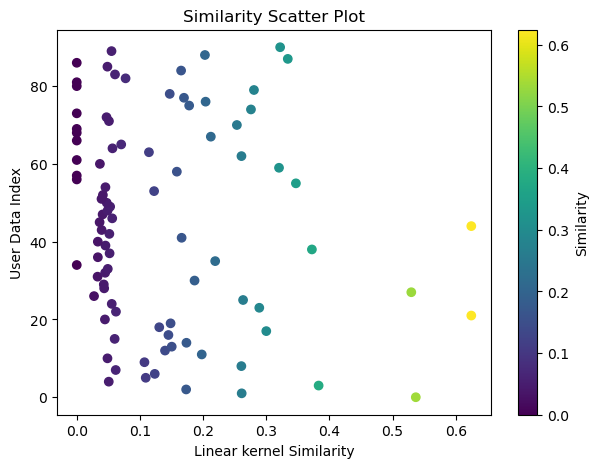

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
151,New Noodle King,Park Street Area,"51, Rafi Ahmed Kidwai Road, Park Street Area, ...",400,"chinese, seafood, momos",3.9,0.624491
632,Noodle Time,Park Street Area,"94A, Ripon Street, Park Street Area, Kolkata",400,"chinese, momos, seafood",4.0,0.624491
1,WOW! Momo,Park Street Area,"57, Park Street, Beside Vodafone Store, Park S...",350,"momos, fast food, tibetan",4.1,0.536630
262,The Biryani Mahal,Park Street Area,"54/2, Rafi Ahmed, Kidwai Road, Park Street Are...",400,"biryani, north indian",3.5,0.529519
10,KFC,Park Street Area,"20K, Park Street Area, Kolkata",400,"burger, fast food, biryani, desserts, beverages",4.2,0.382833


In [100]:
user_choice_cuisine ='momos biryani'
user_choice_Features = 'indoorseating'
user_choice_CostCategory ='midrange'
user_choice_Area='Park Street Area'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory



Final_Recommender(description=description,Area=user_choice_Area)

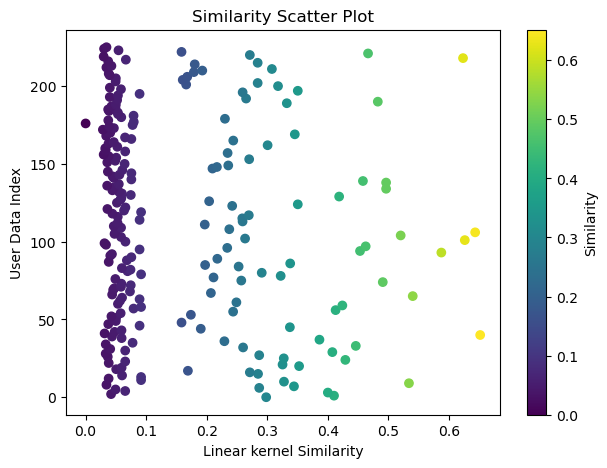

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
2179,Mainland China,Chinar Park,"Premises Bearing CF 326, Shop 2 & 3, Ground Fl...",600,"chinese, desserts, beverages",4.2,0.651632
2459,Food Garage,Chinar Park,"Opposite Sagar Gramin Bank, Helabartala, Hatia...",500,"chinese, fast food, beverages",3.3,0.643341
2419,The Spicy Panda,Chinar Park,"Shri Shakti Apartment, Rajarhat, Gopalpur, Chi...",450,"chinese, momos",0.0,0.626222
4822,Gazab Ba Restaurant,Chinar Park,"211, Kalipark Road, Bablatala, Chinar Park, Ko...",500,"chinese, biryani, north indian",4.1,0.623310
2373,Foodies Hub,Chinar Park,"Ground Floor, Swapnaneer Apartment, Naipukur, ...",500,"chinese, north indian, fast food",0.0,0.587490


In [101]:
user_choice_cuisine ='chinese'
user_choice_Features = 'homedelivery'
user_choice_CostCategory ='expensive'
user_choice_Area='Chinar Park'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


Final_Recommender(description=description,Area=user_choice_Area)
                 

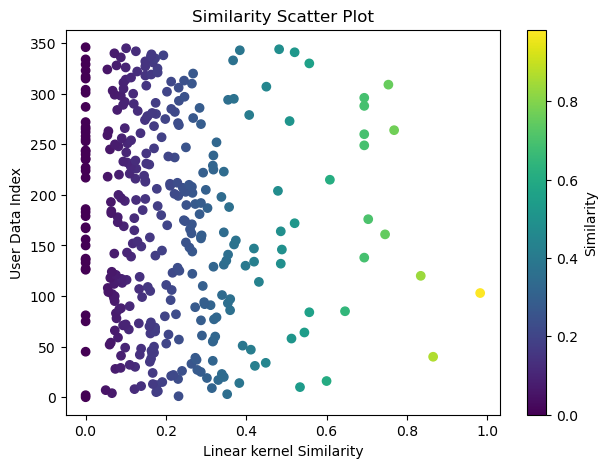

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
2260,Madras Junction,New Town,"Green Residenza, Rajarhat Main Road, New Town,...",250,south indian,4.0,0.982331
1390,Khana khazanaa,New Town,"Shop G4, Ground Floor, NBCC Shopping Centre, A...",300,"north indian, chinese, south indian",3.5,0.865198
2291,Chennai Express,New Town,"Shop C-01, Unitech Gate 1, NKDA Market, New To...",250,south indian,3.3,0.834367
2586,Grace,New Town,"Shop C1, Near Unitech Gate 1, NKDA Market, Pat...",250,"south indian, chinese",0.0,0.768080
2689,Ranuka South Indian Food Centre,New Town,"Shop A 42, NKDA Marked Complex, Opposite Unite...",150,south indian,3.8,0.753816


In [102]:
# User input
user_choice_cuisine ='South indian'
user_choice_Features = 'indoorseating takeaway'
user_choice_CostCategory ='midrange'
user_choice_Area='New Town'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


Final_Recommender(description=description,Area=user_choice_Area)

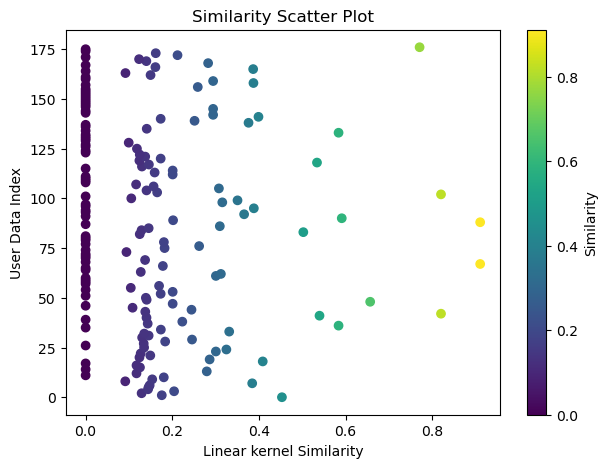

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
1500,Bhojohori Manna Restaurants,Sector 5,"Globsyn Crystal Building, XI & XII, Block EP, ...",350,bengali,0.0,0.910905
1295,Apanjan,Sector 5,"Street 25, RDB Cinema, Block GP Block, Bidhann...",400,bengali,3.9,0.910905
1111,Jessore Local,Sector 5,"Dag 246 Mb 232, Mahishbathan, Bidhannagarrajar...",250,bengali,3.9,0.820461
1600,Bhaaja Fry,Sector 5,"NP-14, Ground Floor, Gobinda Bhawan, Nayapatty...",200,bengali,0.0,0.820461
4190,Lunch Stopper,Sector 5,"Bengal Intelligent Park, Street 18, EP Block, ...",400,"bengali, north indian",4.1,0.771030


In [103]:
user_choice_cuisine ='bengali'
user_choice_Features = 'indoorseating'
user_choice_CostCategory ='midrange'
user_choice_Area='Sector 5'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


Final_Recommender(description=description,Area=user_choice_Area)

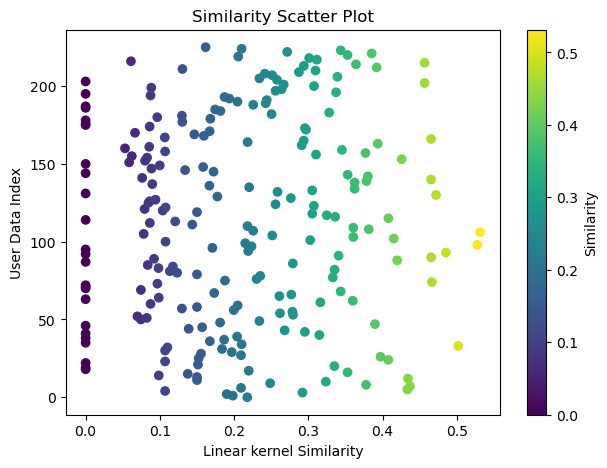

,Name,Area,Full_Address,AverageCost,Cuisines,Total Ratings,similarity
2459,Food Garage,Chinar Park,"Opposite Sagar Gramin Bank, Helabartala, Hatia...",500,"chinese, fast food, beverages",3.3,0.531416
2399,Puchkalicious,Chinar Park,"City Centre 2, Rajarhat, Chinar Park, Kolkata",100,"street food, fast food, beverages",4.1,0.527604
2164,Veg Dhaba,Chinar Park,"AS 164, Rajarhat Main Road, Near Kali Mandir, ...",500,"north indian, chinese, rolls, biryani, kebab",3.7,0.502018
2373,Foodies Hub,Chinar Park,"Ground Floor, Swapnaneer Apartment, Naipukur, ...",500,"chinese, north indian, fast food",0.0,0.485281
2574,Kolkata 99,Chinar Park,"Rajarhat Main Road, Dash Drone, Chinar Park, K...",350,fast food,0.0,0.472029


In [104]:
user_choice_cuisine ='bengali chinese fast food'
user_choice_Features = ' vegonly'
user_choice_CostCategory ='midrange expensive'
user_choice_Area='Chinar Park'

description = user_choice_cuisine + ' ' + user_choice_Features+' '+user_choice_CostCategory


Final_Recommender(description=description,Area=user_choice_Area)

In [105]:
User_Helper_Method()

Some of the popular areas in Kolkata are 
['New Town', 'Chinar Park', 'Baguihati', 'Behala', 'Sector 5']
['Tollygunge', 'Dum Dum', 'Kestopur', 'Jadavpur', 'Sector 1']
['Kasba', 'Park Circus Area', 'Ballygunge', 'Garia', 'Park Street Area']
['Bangur', 'Picnic Garden', 'New Alipore', 'Kaikhali', 'Kankurgachi']

Some of the popular cuisines in Kolkata are 
['chinese', 'north indian', 'fast food', 'beverages', 'desserts']
['biryani', 'bengali', 'rolls', 'mughlai', 'sandwich']
['street food', 'shake', 'pizza', 'momos', 'kebab']
['continental', 'burger', 'bakery', 'south indian', 'italian']

Cost Category are : 
1.Cheapeats
2.MidRange
3.Expensive

Available features are : 
1.Homedelivery
2.Indoorseating
3.Takeway
4.VegOnly


# For testing use:
### User feedback
### A/B testing




